# Cat Detection

Explanation:
detector.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=10, minSize=(75, 75))
- use grayscale image to detect objects;
- scaleFactor define the scale for image pyramid;
- minNeighbors defines number of bounding box tracked in the area as searched object;
- minSize is minimal size of image to be detected.

Procs:
- fast approach;
- idependant from location, scale;
- can run in real-time;
- models can be trained for other objects such as cars, bananas, road signs;

Cons:
- minNeighbour, scaleFactor usually should be tuned;

## Utilities

In [26]:
import argparse
import imutils
import time
from matplotlib import pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [39]:
IMG_PATH = "image/01.jpg"
MODEL_PATH = "haarcascade_frontalcatface.xml"

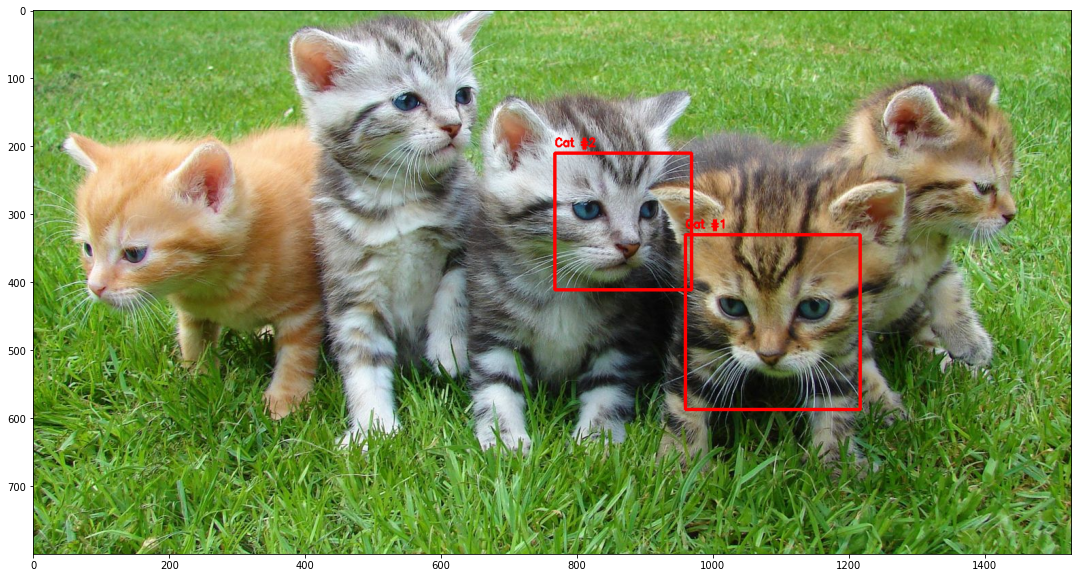

In [35]:
# load the input image and convert it to grayscale
image = cv2.imread(IMG_PATH)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray, cmap='gray')
# load the cat detector Haar cascade, then detect cat faces
# in the input image
detector = cv2.CascadeClassifier(MODEL_PATH)
rects = detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(60, 60))
# loop over the cat faces and draw a rectangle surrounding each
for (i, (x, y, w, h)) in enumerate(rects):
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 4)
    cv2.putText(image, "Cat #{}".format(i + 1), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)
# show the detected cat faces
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## Image Pyramid

In [37]:
import imutils
def pyramid(image, scale=1.5, minSize=(30, 30)):
    # yield the original image
    yield image
    # keep looping over the pyramid
    while True:
        # compute the new dimensions of the image and resize it
        w = int(image.shape[1] / scale)
        image = imutils.resize(image, width=w)
        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
        # yield the next image in the pyramid
        yield image

In [41]:
SCALE = 2
image = cv2.imread(IMG_PATH)
for (i, resized) in enumerate(pyramid(image, scale=SCALE)):
    # show the resized image
    cv2.imshow("Layer {}".format(i + 1), resized)
    cv2.waitKey(0)
# close all windows
cv2.destroyAllWindows()

<img src="image/01.png" width="600" height="200">

# Snippets

In [12]:
# Load the model - use raw link (click button on the page)
import requests
URL = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalcatface.xml"
#URL = "https://github.com/opencv/opencv/blob/master/data/haarcascades/" + MODEL_PATH
response = requests.get(URL)
open(MODEL_PATH, "wb").write(response.content)

411388

# References
- Detecting cats in images with OpenCV by Adrian Rosebrock on June 20, 2016, https://pyimagesearch.com/2016/06/20/detecting-cats-in-images-with-opencv/
- Haar Cascades Repo, https://github.com/opencv/opencv/tree/master/data/haarcascades
- Image Pyramids with Python and OpenCV by Adrian Rosebrock on March 16, 2015 https://pyimagesearch.com/2015/03/16/image-pyramids-with-python-and-opencv/